In [35]:
### Welcome to my Kindle data project! In this project, I will be observing, exploring, and visualizing data about book ratings and prices using Python.
### Specifically, I want this project tailored to showcase my skills using Pandas, NumPy, and Matplotlib. Seaborn may also come in later, but the first three
### libraries are my main concern here. Let's get started!

In [36]:
# Importing the necessary libraries under common aliases.

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [37]:
# Importing the kindle data from a csv. The file I downloaded can be found on Kaggle under the user Asaniczka, who updates the table regularly.
# I retrieved the table on March 5th, 2024. The data is representative of prices and ratings up this point in time. 

kdata=pd.read_csv('kindle_data.csv')

# Getting a feel for the data by printing the first 5 rows. There are 13 columns, most of which consist of strings.

print(kdata.head())

# The following code helps me determine the data type of each column. Important things to note here include:
# The stars, reviews, price and category_id columns are numerical (some float, some int) values
# The isKindleUnlimited, isBestSeller, isEditorsPick, and isGoodReadsChoice are boolean values (true/false)


print(kdata.info())

# The following code quickly sums up the numerical data described above. We can see common metrics like
# mean, median, mode, min, max, and quartile values for the different numerical columns. I will look at
# these more in depth later.

print(kdata.describe())

         asin                                              title  \
0  B00TZE87S4  Adult Children of Emotionally Immature Parents...   
1  B08WCKY8MB  From Strength to Strength: Finding Success, Ha...   
2  B09KPS84CJ  Good Inside: A Guide to Becoming the Parent Yo...   
3  B07S7QPG6J             Everything I Know About Love: A Memoir   
4  B00N6PEQV0  The Seven Principles for Making Marriage Work:...   

              author                    soldBy  stars  reviews  price  \
0  Lindsay C. Gibson   Amazon.com Services LLC    4.8        0   9.99   
1   Arthur C. Brooks   Penguin Group (USA) LLC    4.4        0  16.99   
2      Becky Kennedy  HarperCollins Publishers    4.8        0  16.99   
3     Dolly Alderton  HarperCollins Publishers    4.2        0   9.95   
4       John Gottman          Random House LLC    4.7        0  13.99   

   isKindleUnlimited  category_id  isBestSeller  isEditorsPick  \
0              False            6          True          False   
1              False

In [38]:
# Question number 1: If there is a numerical category_id column, how many categories are there, and what are they?
cat_list = list(kdata.category_name.unique())
print(cat_list)
print(type(cat_list))

['Parenting & Relationships', 'Engineering & Transportation', 'Science & Math', 'Mystery, Thriller & Suspense', 'Crafts, Hobbies & Home', 'Literature & Fiction', 'Biographies & Memoirs', 'Computers & Technology', 'Politics & Social Sciences', 'Teen & Young Adult', 'Foreign Language', 'Science Fiction & Fantasy', 'Travel', 'LGBTQ+ eBooks', 'Religion & Spirituality', 'Arts & Photo graphy', 'Comics', 'Education & Teaching', 'History', 'Cookbooks, Food & Wine', 'Nonfiction', 'Self-Help', 'Romance', 'Humor & Entertainment', 'Reference', 'Health, Fitness & Dieting', 'Sports & Outdoors', 'Medical', 'Business & Money', 'Law', "Children's eBooks"]
<class 'list'>


In [39]:
# The code above may be useful for seeing the categories at a quick glance. However, we know that they are all associated with
# an ID number. Let's build a dataframe that associates the two.

cat_df = kdata.groupby('category_id')['category_name'].unique().explode().reset_index()
print(cat_df)

    category_id                 category_name
0             1           Arts & Photo graphy
1             2                        Comics
2             3          Education & Teaching
3             4                       History
4             5          Literature & Fiction
5             6     Parenting & Relationships
6             7                       Romance
7             8             Sports & Outdoors
8             9         Biographies & Memoirs
9            10        Computers & Technology
10           11  Engineering & Transportation
11           12         Humor & Entertainment
12           13                       Medical
13           14    Politics & Social Sciences
14           15                Science & Math
15           16            Teen & Young Adult
16           17              Business & Money
17           18        Cookbooks, Food & Wine
18           19              Foreign Language
19           20                           Law
20           21  Mystery, Thriller

In [40]:
# Let's dig a little deeper into the category metrics, while we're thinking about it.
# Question 2: How many books exist in each category?

cat_nums = kdata.groupby('category_id').title.count().reset_index()
print(cat_nums)

#Below is a printed summary of the most populated category
max_titles = cat_nums.title.max()
max_titles_catnum = cat_nums['category_id'][(cat_nums.title == max_titles)].iloc[0]
max_titles_cat = cat_df['category_name'][(cat_df.category_id == max_titles_catnum)].iloc[0]
print('The most populated category in the Kindle store is \'{}\' with {} titles.'.format(max_titles_cat, max_titles))

    category_id  title
0             1   4916
1             2    478
2             3   4986
3             4   2045
4             5   4152
5             6   5901
6             7   2214
7             8   3206
8             9   5405
9            10   5504
10           11   6162
11           12   4095
12           13   2583
13           14   4207
14           15   5955
15           16   5738
16           17   2577
17           18   5333
18           19   5724
19           20   5027
20           21   6272
21           22   3388
22           23   3995
23           24   5526
24           25   5747
25           26   5502
26           27   1585
27           28   5517
28           29    899
29           30   4970
30           31   3493
The most populated category in the Kindle store is 'Mystery, Thriller & Suspense' with 6272 titles.


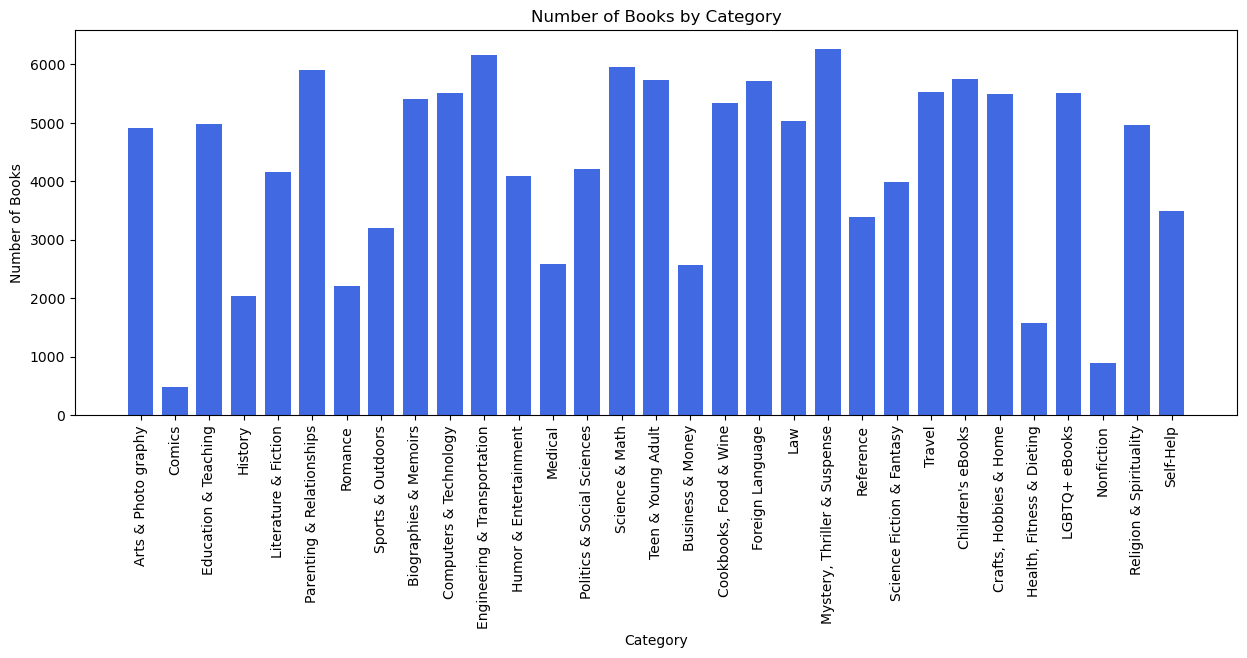

In [41]:
# The dataframe above is great, but might be hard to visualize. Let's throw the values into a bar graph using Matplotlib.
# I want to make the figure big enough to be easily readable, with the category names on the x-axis. To do this, though, I need to put
# a number of tick marks with proper labeling. Let's get started!

plt.figure(figsize=(15, 5))
plt.bar(cat_nums.category_id, height=cat_nums.title, width=0.75, color='royalblue')
plt.title('Number of Books by Category')
plt.xlabel('Category')
plt.xticks(ticks=range(1, 32), labels=cat_df.category_name)
plt.ylabel('Number of Books')
plt.tick_params(axis='x', labelrotation=90)
plt.show()

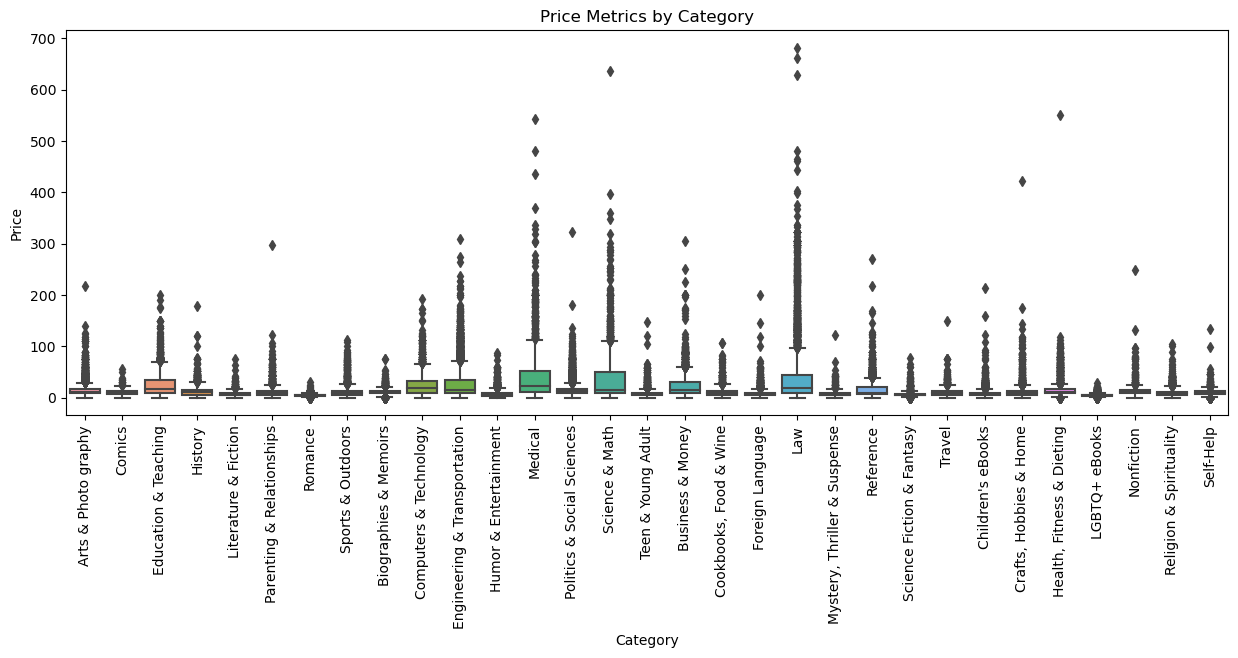

In [42]:
# Now that we've got a good sense of books per category, let's start to look at price metrics for each category.
# We saw earlier in the kdata.describe() print that the average price for all books was about $15.
# Let's determine the average price for each category of books and visualize the spread for each using boxplots.
# Rather than using manpower to make new data series for the prices for each category, seaborn has a boxplot option
# does the work for us.

cat_avg_price = kdata.groupby('category_id').price.mean().reset_index()
cat_avg_price['rounded_price'] = round(cat_avg_price.price, 2)

plt.figure(figsize=(15, 5))
ax=sns.boxplot(x=kdata.category_id, y=kdata.price)
plt.title('Price Metrics by Category')
plt.xlabel('Category')
ax.set_xticks(range(31))
ax.set_xticklabels(cat_df.category_name)
plt.ylabel('Price')
plt.tick_params(axis='x', labelrotation=90)
plt.show()

In [43]:
# Yikes... those are some nasty boxplots. Because all of the diamonds represent outliers, this is not an entirely useful graph to observe.
# I want to trim the price metrics to only include prices of books below 100. Let's begin.

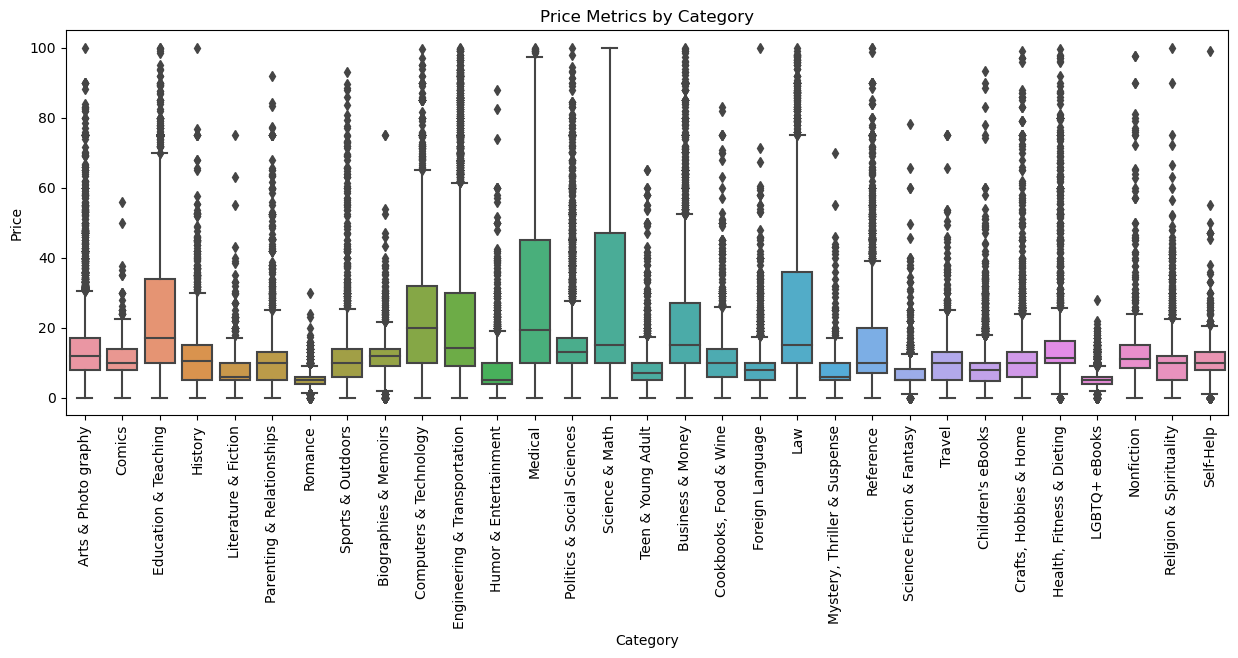

In [44]:
#The following code gives us the kindle data having prices strictly below $100.
kdata_below_100 = kdata[(kdata.price < 100)]
#print(kdata_below_100)

# We can use the same code from before to generate a boxplot with this data.
plt.figure(figsize=(15, 5))
ax = sns.boxplot(x=kdata_below_100.category_id, y=kdata_below_100.price)
plt.title('Price Metrics by Category')
plt.xlabel('Category')
ax.set_xticks(range(31))
ax.set_xticklabels(cat_df.category_name)
plt.ylabel('Price')
plt.tick_params(axis='x', labelrotation=90)
plt.show()

In [45]:
# While this graph is a little easier to read, it is still scattered with outliers. I'm going to tighten the price metric grpah to only include books
# that are below $50. This graph should be much more readable.

    category_id  price
0             1  15.14
1             2  11.37
2             3  24.89
3             4  12.27
4             5   7.41
5             6  10.13
6             7   5.33
7             8  11.76
8             9  11.19
9            10  23.65
10           11  27.39
11           12   7.76
12           13  39.67
13           14  18.32
14           15  32.41
15           16   7.71
16           17  25.32
17           18  10.67
18           19   8.30
19           20  42.48
20           21   7.60
21           22  17.12
22           23   6.73
23           24   9.78
24           25   8.25
25           26  11.47
26           27  18.68
27           28   5.80
28           29  13.89
29           30   9.60
30           31  10.06


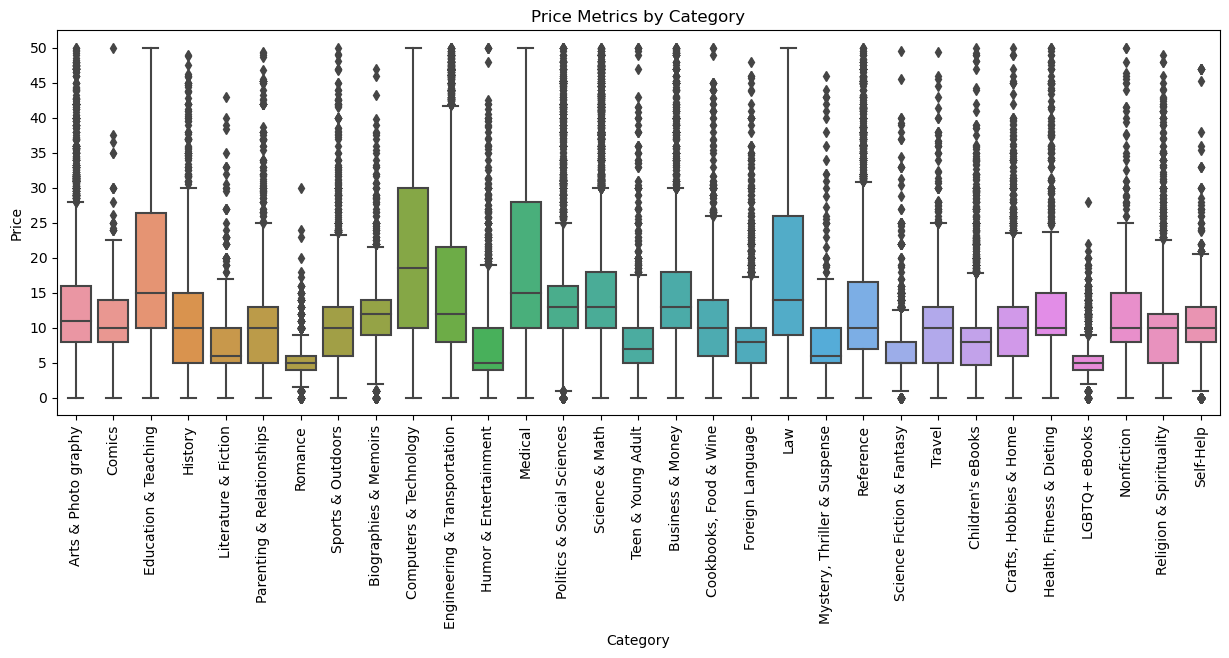

In [46]:
#The following code gives us the kindle data having prices strictly below $50.
kdata_below_50 = kdata[(kdata.price < 50)]
#print(kdata_below_100)
means_below_100 = kdata.groupby('category_id').price.mean().reset_index()
means_below_100['price'] = round(means_below_100.price, 2)
print(means_below_100)

# We can use the same code from before to generate a boxplot with this data.
plt.figure(figsize=(15, 5))
ax = sns.boxplot(x=kdata_below_50.category_id, y=kdata_below_50.price)
plt.title('Price Metrics by Category')
plt.xlabel('Category')
ax.set_xticks(range(31))
ax.set_xticklabels(cat_df.category_name)
ax.set_yticks(range(0, 55, 5))
plt.ylabel('Price')
plt.tick_params(axis='x', labelrotation=90)
plt.show()

In [47]:
# The lowest-cost category overall is the Romance category. A person can expect these types of books to almost always be less than $20.
# The highest-cost category overall is a close race between the Computers/Tech and Medical categories. In both categories,
# the values range all the way from free books to books approaching the $50 mark.

In [48]:
# Now that we've gottne a feel for the price metrics, let's look at the ratings for each gategory.
# We will build a similar table to the first, this time going for avg ratings of all categories.
cat_stars = kdata.groupby('category_id').stars.mean().reset_index()
cat_stars['stars'] = round(cat_stars.stars, 2)
print(cat_stars)

#Printing a summary of the highest-rated category, like before.
max_stars = cat_stars.stars.max()
max_stars_catnum = cat_stars['category_id'][(cat_stars.stars == max_stars)].iloc[0]
max_stars_cat = cat_df['category_name'][(cat_df.category_id == max_stars_catnum)].iloc[0]
print('The highest-rated category (on average) in the Kindle store is \'{}\' with {} stars.'.format(max_stars_cat, max_stars))

    category_id  stars
0             1   4.41
1             2   4.58
2             3   4.36
3             4   4.44
4             5   4.47
5             6   4.45
6             7   4.47
7             8   4.43
8             9   4.44
9            10   4.23
10           11   4.16
11           12   4.40
12           13   4.31
13           14   4.45
14           15   4.45
15           16   4.53
16           17   4.45
17           18   4.39
18           19   4.28
19           20   4.02
20           21   4.43
21           22   4.33
22           23   4.54
23           24   4.27
24           25   4.63
25           26   4.45
26           27   4.51
27           28   4.43
28           29   4.56
29           30   4.63
30           31   4.53
The highest-rated category (on average) in the Kindle store is 'Children's eBooks' with 4.63 stars.


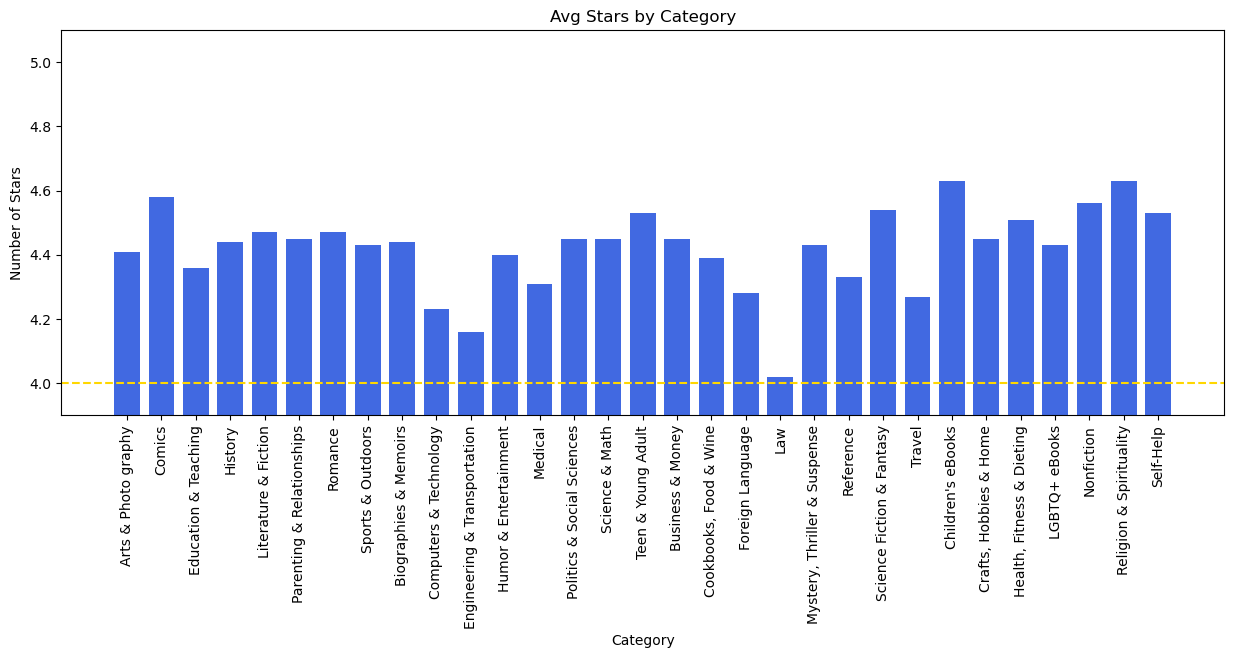

In [49]:
plt.figure(figsize=(15, 5))
plt.bar(cat_stars.category_id, height=cat_stars.stars, width=0.75, color='royalblue')
plt.title('Avg Stars by Category')
plt.xlabel('Category')
plt.xticks(ticks=range(1, 32), labels=cat_df.category_name)
#plt.yticks(ticks=range(4, 5, 0.1))
plt.ylabel('Number of Stars')
plt.ylim([3.9, 5.1])
plt.tick_params(axis='x', labelrotation=90)
plt.axhline(y=4, linestyle='--', color='gold')
plt.show()

In [57]:
# Surprisingly, all book categories are, on average, rated higher than 4 stars. Clearly, some books may be better than others.
# Another interesting find from this graph and the one showing the number of titles per category is the fact that Comics are 
# the least populated category, but the 3rd highest-rated category. Interesting!

In [50]:
# I'm going to take a deep dive into some of my favoite categories: Sci-Fi/Fantasy, Computers and Tech, and Nonfiction.
# I'm also going to look specifically at titles included in Kindle Unlimited. First, I'm going to store the Kindle
# Unilmited titles in a datafrome called "ku".

ku = kdata[(kdata.isKindleUnlimited == True)]
#print(ku.head())
k_count = kdata.asin.count()
ku_count = ku.asin.count()
# print(k_count)
# print(ku_count)
print('While there are {} titles stored in the Kindle, only {} titles are available on Kindle Unlimited. \nLet\'s take a look at some of them!'.format(k_count, ku_count))

# In order to make a dataframe with my favorite columns efficiently, I'm going to use the dataframe .isin() function and a list of my favorites.
favorites =['Science Fiction & Fantasy', 'Computers & Technology', 'Nonfiction']
ku_faves = ku[(ku.category_name.isin(favorites))]
ku_faves_counts = ku_faves.groupby('category_id').asin.count().reset_index()
ku_faves_counts = ku_faves_counts.rename(columns = {'asin' : 'num_books'})
print(ku_faves_counts)

While there are 133102 titles stored in the Kindle, only 35815 titles are available on Kindle Unlimited. 
Let's take a look at some of them!
   category_id  num_books
0           10        883
1           23       2372
2           29        130


In [59]:
# In this cell, I determine the average, maximum and minimum prices for my selected favorite categories. 

ku_faves_avgs = ku_faves.groupby('category_id').price.mean().reset_index()
ku_faves_avgs = ku_faves_avgs.rename(columns = {'price': 'avg_price'})
ku_faves_max = ku_faves.groupby('category_id').price.max().reset_index()
ku_faves_max = ku_faves_max.rename(columns = {'price': 'max_price'})
ku_faves_min = ku_faves.groupby('category_id').price.min().reset_index()
ku_faves_min = ku_faves_min.rename(columns = {'price': 'min_price'})
print(ku_faves_avgs)
print(ku_faves_max)
print(ku_faves_min)

   category_id  avg_price
0           10   7.998494
1           23   5.231766
2           29   7.504923
   category_id  max_price
0           10     150.00
1           23      24.99
2           29      22.50
   category_id  min_price
0           10       0.00
1           23       0.99
2           29       0.99


In [61]:
# Upon further investigation, the average prices for the Computers/Tech category may be a little infalated due
# to the maximum price of $150.00. Fortunately, Numpy has a feature that lets us trim the data before finding an average.
# Let's find a trimmed average for the computers and technology books available on Kindle Unlimited.
# We will need to use the SciPy stats library's trim_mean method

from scipy import stats

comp_tech_ku_prices = ku_faves[(ku_faves.category_id == 10)]['price']
comp_tech_trimmed_mean = stats.trim_mean(comp_tech_ku_prices, 0.05)
print('The trimmed Computers and Technology average price for titles available on Kindle Unlimited is ${}'.format(round(comp_tech_trimmed_mean, 2)))

The trimmed Computers and Technology average price for titles available on Kindle Unlimited is $6.94


In [62]:
#As we can see, excluding  the outermost 5% of the Computers/Technology price data yielded the 
#average price to be a dollar less. 

#Lastly let's observe soem proportions of books that have received rewards. I will do this for all titles available on Kindle
#as well as narrowing down the data to the Kindle Unlimited titles.

In [79]:
best_sellers = kdata[(kdata.isBestSeller == True)]
ku_best_sellers = ku[(ku.isBestSeller == True)]
k_gr = kdata[(kdata.isGoodReadsChoice == True)]
print(best_sellers.asin.count())
print(ku_best_sellers.asin.count())

1402
2236
1465


In [81]:
#In this table, I'm cross-tabluating the data for books being a Kindle Unlimited Title as well as a best seller.
# I observe both the numerical data as well as the proportional values.
ku_bs_freq = pd.crosstab(kdata.isKindleUnlimited, kdata.isBestSeller)
ku_bs_prop = ku_bs_freq/len(kdata)

print(ku_bs_freq)
print(ku_bs_prop)
print('--------------------------')

isBestSeller       False  True 
isKindleUnlimited              
False              96516    771
True               34350   1465
isBestSeller          False     True 
isKindleUnlimited                    
False              0.725128  0.005793
True               0.258073  0.011007


In [89]:
# Rather than comparing best sellers in the kindle vs. kindle unlimited availability, let's look at the comparisons of
# the different categories of possible awards listedn for each title. These are the Best Sellers, Editors Pick and 
# GoodReads Choice titles. Take a look at each cross-tablution, presenting the value comparisons as well as the 
# proportional represenations. 

bs_grc_freq = pd.crosstab(kdata.isBestSeller, kdata.isGoodReadsChoice)
bs_grc_prop = bs_grc_freq/len(kdata)
print(bs_grc_freq)
print(bs_grc_prop)
print('--------------------------')
bs_ep_freq = pd.crosstab(kdata.isBestSeller, kdata.isEditorsPick)
bs_ep_prop = bs_ep_freq/len(kdata)
print(bs_ep_freq)
print(bs_ep_prop)
print('--------------------------')
ep_grc_freq = pd.crosstab(kdata.isEditorsPick, kdata.isGoodReadsChoice)
ep_grc_prop = ep_grc_freq/len(kdata)
print(ep_grc_freq)
print(ep_grc_prop)

isGoodReadsChoice   False  True 
isBestSeller                    
False              129464   1402
True                 2236      0
isGoodReadsChoice     False     True 
isBestSeller                         
False              0.972668  0.010533
True               0.016799  0.000000
--------------------------
isEditorsPick   False  True 
isBestSeller                
False          125245   5621
True             2236      0
isEditorsPick     False     True 
isBestSeller                     
False          0.940970  0.042231
True           0.016799  0.000000
--------------------------
isGoodReadsChoice   False  True 
isEditorsPick                   
False              126079   1402
True                 5621      0
isGoodReadsChoice     False     True 
isEditorsPick                        
False              0.947236  0.010533
True               0.042231  0.000000
